# Cell-based cluster model 
To illustrate an example from a cell model, we will use Model B from [Reynolds et al. 2020](https://ui.adsabs.harvard.edu/abs/2020ApJ...890...59R/abstract), _"Astrophysical Limits on Very Light Axion-like Particles from Chandra Grating Spectroscopy of NGC 1275"_. It is an approximate model for a turbulent field in the Perseus cluster. 

The total magnetic field strength at a distance $z$ along the line of sight is set according to

$$
B(z) = 7.5\,\mu{\rm G} \left[ \frac{n_e(z)}{n_e(25\,{\rm kpc})} \right]^{0.5}
$$

where the electron density $n_e$ is set by the analytic profile given by Churazov et al: 

$$
n_e(z) = \frac{3.9\times10^{-2}}{\left[1+ (z/80\, {\rm kpc})^2\right]^{1.8}} + \frac{4.05\times10^{-3}}{\left[1+ (z/280\, {\rm kpc})^2\right]^{0.87}}
~{\rm cm}^{-3}.
$$

The cell sizes $\Delta z$ are set according to a probability distribution function $p(\Delta z)$, given by a power-law so that 

$$
p(\Delta z) \propto \Delta z^{-1.2}
$$

spanning $3.5-10$\, kpc. In their model B, Reynolds et al. 2020 scale these minimum and maximum cell sizes linearly with radius as $z/50{\rm kpc}$, because coherence lengths are expected to grow with distance from the cluster centre. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import alpro 
alpro.util.set_default_plot_params()

First we initialise the survival class and set up the ALP parameters

In [2]:
s = alpro.Survival("1275b")
s.init_model()
s.set_params(1e-12 * 1e-9, 1e-13)

We can now initialise a random cell model with a given random number seed and plot $B_\perp$ as a function of line of sight distance $z$

Text(0.5, 0, '$z$ (kpc)')

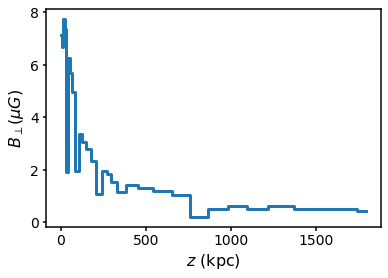

In [3]:
Lmax = 1800.0
i = 0
s.domain.create_box_array(Lmax, i, s.coherence_func, r0=0)
plt.step(s.domain.rcen, s.domain.B * 1e6, where="mid")
plt.ylabel("$B_\perp (\mu G)$")
plt.xlabel("$z$ (kpc)")

Now we can use ALPRO to compute the survival probability 

In [4]:
energies = np.logspace(3,4,1000)
P, Pradial = s.propagate(s.domain, energies, pol="both")

Let's plot the survival probability first using the inbuilt method

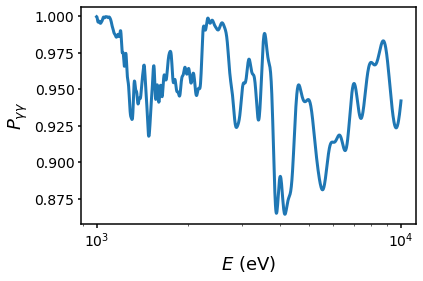

In [5]:
fig = s.default_plot(plot_kwargs = {"lw": 3}, mode="survival")

We can also plot the radial profile at the highest energy

[]

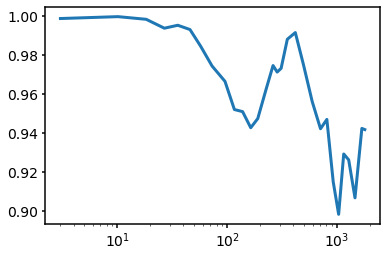

In [6]:
plt.plot(s.domain.rcen, 1.0 - Pradial[:,-1])
plt.semilogx()

We can also plot the radial profile in every energy bin using a colormesh plot

Text(0, 0.5, '$z$ (kpc)')

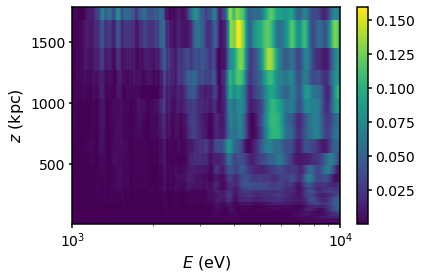

In [7]:
plt.pcolormesh(energies,s.domain.rcen, Pradial)
plt.colorbar()
plt.semilogx()
plt.xlabel("$E$ (eV)")
plt.ylabel("$z$ (kpc)")

## Setting the coherence length / cell size distribution
Model B uses a scaling of the coherence length with radius. This can be modified or turned off via the command `set_coherence_r0`. Setting it to `None` turns it off so the minimum and maximum scale lengths are constant 

Text(0.5, 0, '$z$ (kpc)')

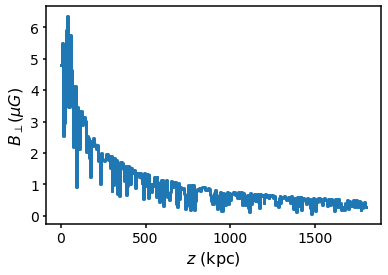

In [8]:
s.set_coherence_r0(None)
s.domain.create_box_array(Lmax, i, s.coherence_func, r0=0)
plt.step(s.domain.rcen, s.domain.B * 1e6, where="mid")
plt.ylabel("$B_\perp (\mu G)$")
plt.xlabel("$z$ (kpc)")

The power-law function can also be customised using the `set_coherence_pl` function. For example, if we want a PDF of the form $p(\Delta z) \propto \Delta z^{-3}$ chosen between 50 and 100 kpc, we can do the following:

Text(0.5, 0, '$z$ (kpc)')

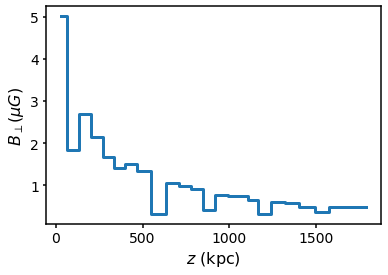

In [9]:
s.set_coherence_pl(n=3, xmin=50.0, xmax=100.0, r0=None)
s.domain.create_box_array(Lmax, i, s.coherence_func, r0=0)
plt.step(s.domain.rcen, s.domain.B * 1e6, where="mid")
plt.ylabel("$B_\perp (\mu G)$")
plt.xlabel("$z$ (kpc)")

For more control over the distribution of cell sizes, any function that chooses random numbers can be passed to the coherence_func object - a convenient way to do this is using a [scipy stats function](https://docs.scipy.org/doc/scipy/reference/stats.html) like rayleigh using the inbuilt `rvs` method. 

Text(0.5, 0, '$z$ (kpc)')

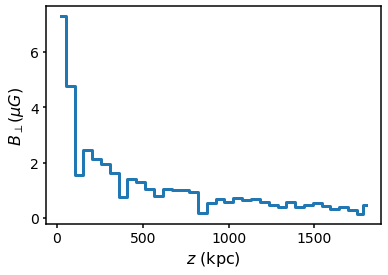

In [10]:
from scipy.stats import rayleigh
s.coherence_func = rayleigh(50).rvs
s.domain.create_box_array(Lmax, i, s.coherence_func, r0=0)
plt.step(s.domain.rcen, s.domain.B * 1e6, where="mid")
plt.ylabel("$B_\perp (\mu G)$")
plt.xlabel("$z$ (kpc)")